# Pre-processing Nevada Site Specific data for WaDEQA upload.
Date Updated: 01/26/2022
Purpose:  To pre-process the Nevada ss data into one master file for simple DataFrame creation and extraction

In [1]:
# Libaries

# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd

# visulizaiton
import matplotlib.pyplot as plt
import seaborn as sns

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Working Directory
workingDir = "C:/Users/rjame/Documents/WSWC Documents/MappingStatesDataToWaDE2.0/Nevada/SiteSpecificAmounts/RawInputData"
os.chdir(workingDir)

## Input Data

In [3]:
# Dataframe Creation - Timeseries
inputFile1 = "Surface_Water_Monitoring_Sites_and_Measures.csv"
df_ts = pd.read_csv(inputFile1)
print(len(df_ts))
df_ts.head(1)

67741


,OBJECTID,Site_name,Discharge,Units,Measure_date,measured_by,Method,GlobalID
0,1,028 N41 E28 17AADD1,0.91,CFS,1939/05/27 00:00:00+00,NaN,QSCMM,{9E855995-E8F6-48EE-A132-40FD5196CCE8}


In [4]:
# Dataframe Creation - Location Info
# Export of Shapefile data
fileInput = "Shapefile/SurfaceWaterMonitoringSites.shp"
df_loc = gpd.read_file(fileInput)
print(len(df_loc))
df_loc.head(1)

1371


,OBJECTID,AutoID,Site_Name,Status,Location_N,Source_Des,Source_Nam,Basin,app,Site_Type,Elev,Data_Sourc,Remarks,Twn,Rng,Sec,County,Lat_DD_NAD,Lon_DD_NAD,GlobalID,geometry
0,1,7321,021 N30 E19 10ACDC1,A,SMOKE CREEK BELOW COUNTY RD. BRIDGE,STREAM,SMOKE CREEK,021,None,None,3894,NDWR,None,N30,E19,10,WASHOE,40.48882,-119.83015,{3D11A680-997C-4F91-ADE2-EBF8528E4BC7},POINT (-119.83015 40.48882)


In [5]:
# Left Join timeseries -to- location via 'Site_Name' field.
df_tsloc = pd.merge(df_ts, df_loc, left_on='Site_name', right_on='Site_Name', how='left')
print(len(df_tsloc))
df_tsloc.head(1)

67741


,OBJECTID_x,Site_name,Discharge,Units,Measure_date,measured_by,Method,GlobalID_x,OBJECTID_y,AutoID,Site_Name,Status,Location_N,Source_Des,Source_Nam,Basin,app,Site_Type,Elev,Data_Sourc,Remarks,Twn,Rng,Sec,County,Lat_DD_NAD,Lon_DD_NAD,GlobalID_y,geometry
0,1,028 N41 E28 17AADD1,0.91,CFS,1939/05/27 00:00:00+00,NaN,QSCMM,{9E855995-E8F6-48EE-A132-40FD5196CCE8},15.0,28.0,028 N41 E28 17AADD1,I,150 YARDS ABOVE HOUSE,STREAM,BARTLETT CREEK,028,None,None,4110.0,NDWR,None,N41,E28,17,Humboldt,41.47777,-118.78836,{ABA4B4B7-F5B8-4D71-B705-B9D984A105C9},POINT (-118.78836 41.47777)


In [6]:
df_tsloc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67741 entries, 0 to 67740
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID_x    67741 non-null  int64   
 1   Site_name     67741 non-null  object  
 2   Discharge     66510 non-null  float64 
 3   Units         67055 non-null  object  
 4   Measure_date  67706 non-null  object  
 5   measured_by   57606 non-null  object  
 6   Method        66116 non-null  object  
 7   GlobalID_x    67741 non-null  object  
 8   OBJECTID_y    67486 non-null  float64 
 9   AutoID        67486 non-null  float64 
 10  Site_Name     67486 non-null  object  
 11  Status        67486 non-null  object  
 12  Location_N    67462 non-null  object  
 13  Source_Des    67486 non-null  object  
 14  Source_Nam    66695 non-null  object  
 15  Basin         67486 non-null  object  
 16  app           3250 non-null   object  
 17  Site_Type     0 non-null      object  
 18  Elev  

## Clean Up / Output DataFrame

In [7]:
# Create temporary main dataframe
dfout = pd.DataFrame(index=df_tsloc.index)

# Water Source Info
dfout['in_WaterSourceName'] = df_tsloc['Source_Nam']

# Site Info
dfout['in_County'] = df_tsloc['County']
dfout['in_Latitude'] = df_tsloc['Lat_DD_NAD'].astype(float)
dfout['in_Longitude'] = df_tsloc['Lon_DD_NAD'].astype(float)
dfout['in_SiteName'] = df_tsloc['Site_Name']
dfout['in_SiteNativeID'] = df_tsloc['AutoID']
dfout['in_SiteTypeCV'] = df_tsloc['Source_Des']

# Site Variable Amount Info
dfout['Units'] = df_tsloc['Units']
dfout['in_Amount'] = df_tsloc['Discharge'].astype(float)
dfout['in_ReportYearCV'] =  df_tsloc['Measure_date']
dfout['in_TimeframeStart'] = df_tsloc['Measure_date']
dfout['in_TimeframeEnd'] = df_tsloc['Measure_date']

print(len(dfout))
dfout.head(1)

67741


,in_WaterSourceName,in_County,in_Latitude,in_Longitude,in_SiteName,in_SiteNativeID,in_SiteTypeCV,Units,in_Amount,in_ReportYearCV,in_TimeframeStart,in_TimeframeEnd
0,BARTLETT CREEK,Humboldt,41.47777,-118.78836,028 N41 E28 17AADD1,28.0,STREAM,CFS,0.91,1939/05/27 00:00:00+00,1939/05/27 00:00:00+00,1939/05/27 00:00:00+00


In [8]:
# Convert all GPM amounts to CFS for simplicity.

def convertGPMtoCFS(Aval, Uval):
    Uval = str(Uval).strip().lower()
    if Uval == "gpm":
        outValue = Aval * 0.00222800926
    else:
        outValue = Aval
    return outValue

dfout['in_Amount'] = dfout.apply(lambda row: convertGPMtoCFS(row['in_Amount'], row['Units']), axis=1)
dfout = dfout.drop(['Units'], axis=1)
dfout.head()

,in_WaterSourceName,in_County,in_Latitude,in_Longitude,in_SiteName,in_SiteNativeID,in_SiteTypeCV,in_Amount,in_ReportYearCV,in_TimeframeStart,in_TimeframeEnd
0,BARTLETT CREEK,Humboldt,41.47777,-118.78836,028 N41 E28 17AADD1,28.0,STREAM,0.91,1939/05/27 00:00:00+00,1939/05/27 00:00:00+00,1939/05/27 00:00:00+00
1,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,1.38,1997/06/23 00:00:00+00,1997/06/23 00:00:00+00,1997/06/23 00:00:00+00
2,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.61,1997/07/22 00:00:00+00,1997/07/22 00:00:00+00,1997/07/22 00:00:00+00
3,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.43,1997/08/19 00:00:00+00,1997/08/19 00:00:00+00,1997/08/19 00:00:00+00
4,DEEP CREEK,Elko,41.60963,-115.89373,037 N43 E54 21ADCB1,30.0,STREAM,4.33,1997/05/16 00:00:00+00,1997/05/16 00:00:00+00,1997/05/16 00:00:00+00


In [9]:
# Convert History Year to YYYY-MM-DD format.  # Convert ReportYearCV to int.

dfout['in_ReportYearCV'] = pd.to_datetime(dfout['in_ReportYearCV'], errors = 'coerce')
dfout['in_ReportYearCV'] = pd.to_datetime(dfout["in_ReportYearCV"].dt.strftime('%Y'))
dfout['in_ReportYearCV'] = dfout['in_ReportYearCV'].dt.to_period('Y').astype(str)

dfout['in_TimeframeStart'] = pd.to_datetime(dfout['in_TimeframeStart'], errors = 'coerce')
dfout['in_TimeframeStart'] = pd.to_datetime(dfout["in_TimeframeStart"].dt.strftime('%m/%d/%Y'))

dfout['in_TimeframeEnd'] = pd.to_datetime(dfout['in_TimeframeEnd'], errors = 'coerce')
dfout['in_TimeframeEnd'] = pd.to_datetime(dfout["in_TimeframeEnd"].dt.strftime('%m/%d/%Y'))

dfout.head()

,in_WaterSourceName,in_County,in_Latitude,in_Longitude,in_SiteName,in_SiteNativeID,in_SiteTypeCV,in_Amount,in_ReportYearCV,in_TimeframeStart,in_TimeframeEnd
0,BARTLETT CREEK,Humboldt,41.47777,-118.78836,028 N41 E28 17AADD1,28.0,STREAM,0.91,1939,1939-05-27,1939-05-27
1,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,1.38,1997,1997-06-23,1997-06-23
2,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.61,1997,1997-07-22,1997-07-22
3,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.43,1997,1997-08-19,1997-08-19
4,DEEP CREEK,Elko,41.60963,-115.89373,037 N43 E54 21ADCB1,30.0,STREAM,4.33,1997,1997-05-16,1997-05-16


In [10]:
# For SiteTypeCV change nan values to Unspecified

def changeNanSiteTypeCV(STcv):
    STcv = str(STcv).strip()
    if STcv == "" or STcv == 'nan' or pd.isnull(STcv):
        outString = "Unspecified"
    else:
        outString = STcv
    return outString

dfout['in_SiteTypeCV'] = dfout.apply(lambda row: changeNanSiteTypeCV(row['in_SiteTypeCV']), axis=1)
dfout.head()

,in_WaterSourceName,in_County,in_Latitude,in_Longitude,in_SiteName,in_SiteNativeID,in_SiteTypeCV,in_Amount,in_ReportYearCV,in_TimeframeStart,in_TimeframeEnd
0,BARTLETT CREEK,Humboldt,41.47777,-118.78836,028 N41 E28 17AADD1,28.0,STREAM,0.91,1939,1939-05-27,1939-05-27
1,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,1.38,1997,1997-06-23,1997-06-23
2,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.61,1997,1997-07-22,1997-07-22
3,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.43,1997,1997-08-19,1997-08-19
4,DEEP CREEK,Elko,41.60963,-115.89373,037 N43 E54 21ADCB1,30.0,STREAM,4.33,1997,1997-05-16,1997-05-16


In [11]:
# Add Water Source Type based on SiteTypeCV

def addWaterSourceType(WSTcv):
    WSTcv = str(WSTcv).strip().lower()
    if WSTcv == "wells" or WSTcv == 'well' or WSTcv == 'flowing well' or WSTcv == 'spring':
        outString = "Groundwater"
    else:
        outString = "Surface Water"
    return outString

dfout['in_WaterSourceTypeCV'] = dfout.apply(lambda row: addWaterSourceType(row['in_SiteTypeCV']), axis=1)
dfout.head()

,in_WaterSourceName,in_County,in_Latitude,in_Longitude,in_SiteName,in_SiteNativeID,in_SiteTypeCV,in_Amount,in_ReportYearCV,in_TimeframeStart,in_TimeframeEnd,in_WaterSourceTypeCV
0,BARTLETT CREEK,Humboldt,41.47777,-118.78836,028 N41 E28 17AADD1,28.0,STREAM,0.91,1939,1939-05-27,1939-05-27,Surface Water
1,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,1.38,1997,1997-06-23,1997-06-23,Surface Water
2,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.61,1997,1997-07-22,1997-07-22,Surface Water
3,RIFFE CREEK,Elko,41.63788,-115.87182,037 N43 E54 10ADDC1,29.0,STREAM,0.43,1997,1997-08-19,1997-08-19,Surface Water
4,DEEP CREEK,Elko,41.60963,-115.89373,037 N43 E54 21ADCB1,30.0,STREAM,4.33,1997,1997-05-16,1997-05-16,Surface Water


## WaDE Custom Elements (due to missing info)

In [12]:
# Creating WaDE Custom water source native ID for easy water source identification
# ----------------------------------------------------------------------------------------------------

# Create temp WaterSourceNativeID dataframe of unique water source.
def assignWaterSourceNativeID(colrowValue):
    string1 = str(colrowValue)
    outstring = "WaDENV_WS" + string1
    return outstring

dfWaterSourceNativeID = pd.DataFrame()
dfWaterSourceNativeID['in_WaterSourceName'] = dfout['in_WaterSourceName']
dfWaterSourceNativeID = dfWaterSourceNativeID.drop_duplicates()

dftemp = pd.DataFrame(index=dfWaterSourceNativeID.index)
dftemp["Count"] = range(1, len(dftemp.index) + 1)
dfWaterSourceNativeID['in_WaterSourceNativeID'] = dftemp.apply(lambda row: assignWaterSourceNativeID(row['Count']), axis=1)

# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom water source native ID
def retrieveWaterSourceNativeID(A):
    ml = dfWaterSourceNativeID.loc[(dfWaterSourceNativeID['in_WaterSourceName'] == A), 'in_WaterSourceNativeID']
    if not (ml.empty):  # check if the series is empty
        outList = ml.iloc[0]
    else:
        outList = ''
    return outList

dfout['in_WaterSourceNativeID'] = dfout.apply(lambda row: retrieveWaterSourceNativeID( row['in_WaterSourceName']), axis=1)
dfout.head(1)

,in_WaterSourceName,in_County,in_Latitude,in_Longitude,in_SiteName,in_SiteNativeID,in_SiteTypeCV,in_Amount,in_ReportYearCV,in_TimeframeStart,in_TimeframeEnd,in_WaterSourceTypeCV,in_WaterSourceNativeID
0,BARTLETT CREEK,Humboldt,41.47777,-118.78836,028 N41 E28 17AADD1,28.0,STREAM,0.91,1939,1939-05-27,1939-05-27,Surface Water,WaDENV_WS1


## Inspect Data

In [13]:
dfout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67741 entries, 0 to 67740
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   in_WaterSourceName      66695 non-null  object        
 1   in_County               66937 non-null  object        
 2   in_Latitude             67486 non-null  float64       
 3   in_Longitude            67486 non-null  float64       
 4   in_SiteName             67486 non-null  object        
 5   in_SiteNativeID         67486 non-null  float64       
 6   in_SiteTypeCV           67741 non-null  object        
 7   in_Amount               66510 non-null  float64       
 8   in_ReportYearCV         67741 non-null  object        
 9   in_TimeframeStart       67706 non-null  datetime64[ns]
 10  in_TimeframeEnd         67706 non-null  datetime64[ns]
 11  in_WaterSourceTypeCV    67741 non-null  object        
 12  in_WaterSourceNativeID  67741 non-null  object

In [14]:
dfout['in_SiteTypeCV'].unique()

array(['STREAM', 'SPRING', 'Spring', 'Wells', 'Unspecified', 'Stream',
       'Spring Seep', 'Flowing Well', 'Well', 'SEEP', 'SPR'], dtype=object)

In [15]:
dfout['in_ReportYearCV'].unique()

array(['1939', '1997', '2011', '1971', '1993', '1994', '1995', '1996',
       '1998', '1999', '2000', '2001', '2002', '2017', '2015', '2016',
       '2018', '1912', '1965', '1966', '2014', '1977', '2007', 'NaT',
       '2019', '2012', '1981', '1982', '2020', '2021', '2013', '2004',
       '2010', '2008', '2006', '2009', '2005', '2003', '1978', '1992',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1963', '1975', '1976', '1948', '1949', '1956', '1957', '1900',
       '1902', '1903', '1904', '1947', '1950', '1951', '1915', '1983',
       '1940', '1960', '1959', '1958', '1967', '1962', '1905', '1919',
       '1924', '1920', '1945', '1980', '1937', '1968', '1979', '1970',
       '1972', '1974', '1928', '1964', '1916', '1927', '1930', '1926',
       '1914', '1911', '1969', '1973', '1917', '1925', '1942', '1918',
       '1943', '1953', '1913', '1954', '1955', '1910', '1923', '1946',
       '1961', '1931', '1934', '1941', '1936'], dtype=object)

<AxesSubplot:xlabel='in_Amount'>

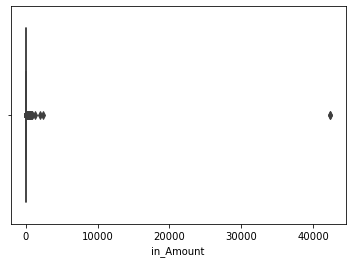

In [16]:
# Inspect amount distribution.

# This is correct, there are at least two sites with > 40,000 CFS.
sns.boxplot(data=dfout, x="in_Amount")

## Export Output Dataframe

In [17]:
#Exporting to Finished File
dfout.to_csv('P_nvSSMaster.csv', index=False)  # The output